In [44]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.charts import Bar,Line
from bokeh.layouts import column,row
import glob as glob
# from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
# import plotly.plotly as py
# import plotly.graph_objs as go

%matplotlib inline

output_notebook()

Loading BokehJS ...

### RHC - PHC - SC : Visits

The cleaned file `Centre-Summary.xlsx` contains average OPD attendance at all centres grouped by their types.

In [45]:
centreSummary = pd.read_excel('~/Workspace/SocialCops/NRHM/Maharashtra/Nagpur/2015-16/Scripts/Preprocessing/Output/Cleaned/Centre-Summary.xlsx')
p = Line(centreSummary, notebook=True)
p.xaxis.axis_label = 'Month'
p.yaxis.axis_label = 'Average OPD Attendance'
p.width = 900
p.height = 450
show(p)

# Health Data: Sample EDA

The file `Nagpur - Consolidated.xlsx` prepared in cleaning notebook has all the data points summed up; a good measure of indicators. 

In [46]:
# Load consolidated data
nagpurData = pd.read_excel('~/Workspace/SocialCops/NRHM/Maharashtra/Nagpur/2015-16/Scripts/Preprocessing/Output/Cleaned/Nagpur - Consolidated.xlsx',index_col=range(5))
nagpurData = nagpurData.sort_index(level=0)

KPIs are distributed across 4 categories.

In [47]:
nagpurData.index.levels[0]

Index([u'Health Facility Services', u'Mortality Details', u'Other Programmes',
       u'Reproductive and Child Health'],
      dtype='object')

And a loads of subcategories

In [48]:
nagpurData.index.levels[1]

Index([u'ANC', u'Adults Deaths', u'Blindness Control Programme',
       u'C-Sections performed at', u'Child Immunisation',
       u'Childhood diseases', u'Complicated Pregnancies', u'Deliveries',
       u'Family Planning', u'Infant/Child Deaths', u'Laboratory Testing',
       u'Medical Termination of Pregnancy (MTP)', u'Patient Services',
       u'Post Natal Care', u'Pregnancy outcome and New-born details',
       u'RTI/STI Cases', u'Vitamin A Doses'],
      dtype='object')

and sub-categores of those

In [49]:
nagpurData.index.levels[2]

Index([u'Administered between 9 months and 5 years',
       u'Adolescent/Adult deaths by cause',
       u'Adverse Event Following Immunisation (AEFI)', u'Deaths', u'Details',
       u'Details of Newborn children weighed', u'General', u'HIV Tests',
       u'Hb Tests', u'Home', u'Immunisation Sessions',
       u'Infant Deaths up to 4 weeks by cause',
       u'Infant/Child Deaths up to 5 years by cause', u'Inpatient',
       u'Malaria Tests', u'Maternal Deaths', u'Number of IUD Insertions at',
       u'Number of Infants 0 to 11 months old who received',
       u'Number of Laparoscopic sterilizations conducted at',
       u'Number of Mini-lap sterilizations conducted at',
       u'Number of NSV/Conventional Vasectomy conducted at',
       u'Number of Post-Partum sterilizations conducted at',
       u'Number of children aged between 12 and 23 months who have been fully immunised',
       u'Number of children aged between 9 and 11 months who have been fully immunised',
       u'Number of chi

In [50]:
nagpurData.loc['Health Facility Services','Laboratory Testing'].loc['HIV Tests']

Apr-2015  May-2015  Jun-2015  Jul-2015  \
Female with ANC    Number Positive         2         3         1         1   
                   Number tested        2114      2317      2602      3155   
Female-Non ANC     Number Positive         8        14         9        11   
                   Number tested         939      1129      1258      1531   
Male               Number Positive        12        27        22        18   
                   Number tested        2301      2339      2367      3075   
Total {(a) to (c)} Number Positive        22        44        32        30   
                   Number tested        5354      5785      6227      7761   

                                    Aug-2015  Sep-2015  Oct-2015  Nov-2015  \
Female with ANC    Number Positive         3         2         1        17   
                   Number tested        3092      2428      2468      2040   
Female-Non ANC     Number Positive         0         7         3         3   
                   Number tested         790       786       818       787   
Male               Number Positive        13        14         8         7   
                   Number tested        2067      2101      1855      1511   
Total {(a) to (c)} Number Positive        16        23        12        27   
                   Number tested        5949      5315      5141      4338   

                                    Dec-2015  Jan-2016  Feb-2016  Mar-2016  
Female with ANC    Number Positive         1         0         6         2  
                   Number tested        2624      2153      2242      2354  
Female-Non ANC     Number Positive         8        27         7         6  
                   Number tested         815      1730      1694      1474  
Male               Number Positive        14        16        19        13  
                   Number tested        2069      3750      3652      2954  
Total {(a) to (c)} Number Positive        23        43        32        21  
                   Number tested        5508      7633      7588      6782

by chaianing indices; another example

In [51]:
nagpurData.loc['Mortality Details','Infant/Child Deaths','Infant/Child Deaths up to 5 years by cause']

Apr-2015  May-2015  Jun-2015  \
Diarrhoea     Between 1 month and 11 months         0         0         0   
              Between 1 year & 5 years              0         0         0   
              Total                                 0         0         0   
Fever related Between 1 month and 11 months         0         0         0   
              Between 1 year & 5 years              0         0         0   
              Total                                 0         0         0   
Measles       Between 1 month and 11 months         0         0         0   
              Between 1 year & 5 years              0         0         0   
              Total                                 0         0         0   
Others        Between 1 month and 11 months        16         8         4   
              Between 1 year & 5 years             10        18         8   
              Total                                26        26        12   
Pneumonia     Between 1 month and 11 months         0         0         0   
              Between 1 year & 5 years              0         1         0   
              Total                                 0         1         0   

                                             Jul-2015  Aug-2015  Sep-2015  \
Diarrhoea     Between 1 month and 11 months         0         0         0   
              Between 1 year & 5 years              0         0         0   
              Total                                 0         0         0   
Fever related Between 1 month and 11 months         0         0         0   
              Between 1 year & 5 years              0         0         0   
              Total                                 0         0         0   
Measles       Between 1 month and 11 months         0         0         0   
              Between 1 year & 5 years              0         0         0   
              Total                                 0         0         0   
Others        Between 1 month and 11 months        12        10         7   
              Between 1 year & 5 years             15        12         8   
              Total                                27        22        15   
Pneumonia     Between 1 month and 11 months         0         0         0   
              Between 1 year & 5 years              0         0         0   
              Total                                 0         0         0   

                                             Oct-2015  Nov-2015  Dec-2015  \
Diarrhoea     Between 1 month and 11 months         0         0         0   
              Between 1 year & 5 years              0         0         0   
              Total                                 0         0         0   
Fever related Between 1 month and 11 months         0         0         0   
              Between 1 year & 5 years              0         0         0   
              Total                                 0         0         0   
Measles       Between 1 month and 11 months         0         0         0   
              Between 1 year & 5 years              0         0         0   
              Total                                 0         0         0   
Others        Between 1 month and 11 months        10         2         8   
              Between 1 year & 5 years              4        12         6   
              Total                                14        14        14   
Pneumonia     Between 1 month and 11 months         0         0         0   
              Between 1 year & 5 years              1         0         0   
              Total                                 1         0         0   

                                             Jan-2016  Feb-2016  Mar-2016  
Diarrhoea     Between 1 month and 11 months         0         0         0  
              Between 1 year & 5 years              0         0         0  
              Total                                 0         0         0  
Fever related Between 1 month and 11 month

We can also easily plot these dataframes

In [52]:
# relevant data
sterlizationDF = nagpurData.loc['Reproductive and Child Health','Family Planning','Number of Mini-lap sterilizations conducted at']

In [53]:
# Have a look to see indices; might need fixing
sterlizationDF.head()

Apr-2015  \
Private Institutions At Private facilities                                   5   
Public Institutions  At CHCs                                                34   
                     At Other State Owned Public Institutions                0   
                     At PHCs                                               229   
                     At Sub-divisional hospitals/ District Hospitals        15   

                                                                      May-2015  \
Private Institutions At Private facilities                                   4   
Public Institutions  At CHCs                                                 6   
                     At Other State Owned Public Institutions                0   
                     At PHCs                                               113   
                     At Sub-divisional hospitals/ District Hospitals        10   

                                                                      Jun-2015  \
Private Institutions At Private facilities                                  18   
Public Institutions  At CHCs                                                36   
                     At Other State Owned Public Institutions                0   
                     At PHCs                                               316   
                     At Sub-divisional hospitals/ District Hospitals        14   

                                                                      Jul-2015  \
Private Institutions At Private facilities                                   1   
Public Institutions  At CHCs                                                40   
                     At Other State Owned Public Institutions                0   
                     At PHCs                                               468   
                     At Sub-divisional hospitals/ District Hospitals         7   

                                                                      Aug-2015  \
Private Institutions At Private facilities                                   6   
Public Institutions  At CHCs                                                32   
                     At Other State Owned Public Institutions                0   
                     At PHCs                                               299   
                     At Sub-divisional hospitals/ District Hospitals        17   

                                                                      Sep-2015  \
Private Institutions At Private facilities                                   1   
Public Institutions  At CHCs                                                47   
                     At Other State Owned Public Institutions                0   
                     At PHCs                                               454   
                     At Sub-divisional hospitals/ District Hospitals        15   

                                                                      Oct-2015  \
Private Institutions At Private facilities                                   9   
Public Institutions  At CHCs                                                68   
                     At Other State Owned Public Institutions                0   
                     At PHCs                                               618   
                     At Sub-divisional hospitals/ District Hospitals         9   

                                                                      Nov-2015  \
Private Institutions At Private facilities                                   3   
Public Institutions  At CHCs                                                37   
                     At Other State Owned Public Institutions                0   
                     At PHCs                                               443   
                     At Sub-divisional hospitals/ District Hospitals         1   

                                                                      Dec-2015  \
Private Institutions At Private facilities  

In [54]:
# Tidy up data
privData = sterlizationDF.iloc[:1,]
publicData = pd.DataFrame(sterlizationDF.iloc[1:,].apply(np.sum,axis=0)).T

# Fix indices
privData.index = ['Private']
publicData.index = ['Public']

# Combine and traspose (Tidy data principles)
df = pd.concat([privData,publicData]).T

p1 = Line(df, notebook=True,tools = "")
p1.xaxis.axis_label = 'Sterlizations'
p1.yaxis.axis_label = 'Metric'
p1.width = 900
p1.height = 450
show(p1)

Following are a few more examples

## Reproductive and Child Health

In [55]:
repData = nagpurData.loc['Reproductive and Child Health']

### ANC

In [56]:
ancData = repData.loc['ANC']

#### General Trends

In [57]:
ancGeneral = ancData.loc['General']
ancGeneral.index = ['New JSY Registartions','Pregnancy Kits used','Women receiving 3 ANC checkups','Registred at ANC in 1st Trimster','Registered at ANC']

In [58]:
p1 = Line(ancGeneral.T, notebook=True)
p1.xaxis.axis_label = 'Month'
p1.yaxis.axis_label = 'Metric'
p1.width = 450
p1.height = 450

#### Pregnant Women vaccinations

In [59]:
vaccData = ancData.loc['Number of pregnant women given']

In [60]:
vaccData.head()

,,Apr-2015,May-2015,Jun-2015,Jul-2015,Aug-2015,Sep-2015,Oct-2015,Nov-2015,Dec-2015,Jan-2016,Feb-2016,Mar-2016
TT1,TOTAL,3668,3376,3691,3968,3917,3425,3787,2835,3929,3668,3842,4042
TT2 or Booster,TOTAL,4389,4183,4520,4514,4570,4187,4473,4098,4284,4545,4597,4887
Total number of pregnant women given 100 IFA tablets,TOTAL,3619,3552,3881,3569,3424,3043,3340,2683,3547,2863,2893,2837


In [61]:
vaccData.index = ['TT1','TT2 or Booster','IFA Tablets']

In [62]:
p2 = Line(vaccData.T, notebook=True)
p2.xaxis.axis_label = 'Month'
p2.yaxis.axis_label = 'Medicine'
p2.width = 450
p2.height = 450

#### Anaemia and Hypertension

In [63]:
anaData = ancData.loc['Pregnant women with Anaemia']

In [64]:
anaData.head()

,,Apr-2015,May-2015,Jun-2015,Jul-2015,Aug-2015,Sep-2015,Oct-2015,Nov-2015,Dec-2015,Jan-2016,Feb-2016,Mar-2016
Number having Hb level<11 (tested cases),TOTAL,5196,4554,5302,5638,5110,4788,5041,4474,5443,5312,5589,5794
Number having severe anaemia (Hb<7) treated at institution,TOTAL,27,41,19,70,17,25,27,50,17,25,23,20


In [65]:
anaData.index = ['Hb<11','Hb<7 Severe']

In [66]:
p3 = Line(anaData.T, notebook=True)
p3.xaxis.axis_label = 'Month'
p3.yaxis.axis_label = 'Anaemia Cases'
p3.width = 450
p3.height = 450

In [67]:
hypData = ancData.loc['Pregnant women with Hypertension (BP>140/90)']

In [68]:
hypData.head()

,,Apr-2015,May-2015,Jun-2015,Jul-2015,Aug-2015,Sep-2015,Oct-2015,Nov-2015,Dec-2015,Jan-2016,Feb-2016,Mar-2016
New cases detected at institution,TOTAL,48,21,47,51,48,47,36,25,76,34,133,46
Number of Eclampsia cases managed during delivery,TOTAL,1,0,0,1,1,1,1,5,1,3,0,5


In [69]:
hypData.index = ['New cases','Eclampsia cases managed ']

In [70]:
p4 = Line(hypData.T, notebook=True)
p4.xaxis.axis_label = 'Month'
p4.yaxis.axis_label = 'Hypertension Cases'
p4.width = 450
p4.height = 450
show(column(row(p1,p2),row(p3,p4)))

### Deliveries

In [71]:
deliveryData = repData.loc['Deliveries']
homeDeliveries = deliveryData.loc['Home']
privDeliveries = deliveryData.loc['Private Institutions']
publicDeliveries = deliveryData.loc['Public Institutions']
deliveryFrames = [homeDeliveries.loc['Total {(a) to (b)}','TOTAL']
          ,privDeliveries.loc['Number of Deliveries  at accredited Private Institutions','TOTAL']
          ,publicDeliveries.loc['Deliveries conducted at Public Institutions ','TOTAL']]
data = pd.concat(deliveryFrames,axis=1)
data.columns = ['Home','Private','Public']

In [72]:
p5 = Line(data, notebook=True)
p5.xaxis.axis_label = 'Month'
p5.yaxis.axis_label = 'Deliveires'
p5.width = 900
p5.height = 450
show(p5)

#### JSY Distribution
##### Mothers

In [73]:
homeJSY = homeDeliveries.loc['Number of mothers paid JSY incentive for Home deliveries']
privMothJSY = privDeliveries.loc['JSY Incentive paid to','Mothers ']
publMothJSY = publicDeliveries.loc['JSY Incentive paid to','Mothers ']

In [74]:
mothJSY = pd.DataFrame(dict({"Home":homeJSY.values[0],"Private":privMothJSY.values,"Public":publMothJSY.values}))
mothJSY.index = privMothJSY.index


In [75]:
p6 = Line(mothJSY, notebook=True)
p6.xaxis.axis_label = 'Month'
p6.yaxis.axis_label = 'Mothers'
p6.width = 450
p6.height = 450


##### ASHAs

In [76]:
privASHAJSY = privDeliveries.loc['JSY Incentive paid to','ASHAs']
publASHAJSY = publicDeliveries.loc['JSY Incentive paid to','ASHAs']
ASHAsJSY = pd.DataFrame(dict({"Private":privASHAJSY.values,"Public":publASHAJSY.values}))
ASHAsJSY.index = privASHAJSY.index

In [77]:
p7 = Line(ASHAsJSY, notebook=True)
p7.xaxis.axis_label = 'Month'
p7.yaxis.axis_label = 'ASHAs'
p7.width = 450
p7.height = 450
show(row(p6,p7))

### C - Sections

In [78]:
cSectData = repData.loc['C-Sections performed at']
privCSecData = cSectData.loc['Private Institutions','Private facilities']
publCSecData = cSectData.loc['Public Institutions','Total {(3.1.1) to (3.1.4)}']

In [79]:
CSectDF = pd.DataFrame(dict({"Private":privCSecData.values[0],"Public":publCSecData.values[0]}))
CSectDF.index = privCSecData.T.index

In [80]:
p8 = Line(CSectDF, notebook=True)
p8.xaxis.axis_label = 'Month'
p8.yaxis.axis_label = 'C- Sections'
p8.width = 900
p8.height = 450
show(p8)

### Pregnancy outcomes' details

In [81]:
pregOutData=repData.loc['Pregnancy outcome and New-born details']
outcomeDF = pregOutData.loc['Pregnancy Outcome ']
detailDF = pregOutData.loc['Details of Newborn children weighed']


#### Sex Ratio

In [82]:
sexRatioData = outcomeDF.iloc[1:3,].T
sexRatioData.columns=['Female','Male']
p = Line(sexRatioData, notebook=True)
p.xaxis.axis_label = 'Month'
p.yaxis.axis_label = 'Live births'
p.width = 900
p.height = 450

#### Abortions, Still births

In [83]:
abortData = outcomeDF.loc['Abortion (spontaneous/induced)']
stillBirthData = outcomeDF.loc['Still Birth']
liveBirths =(sexRatioData.apply(np.sum,axis=1))
df = pd.DataFrame(dict({"Still births":stillBirthData.values[0],"Abortions":abortData.values[0],"Live":liveBirths.values}))
df.index = abortData.T.index

In [84]:
p1 = Line(df, notebook=True)
p1.xaxis.axis_label = 'Month'
p1.yaxis.axis_label = 'Births'
p1.width = 450
p1.height = 450


### Newborn details

In [85]:
df = detailDF.T
df.columns = ['Breastfed within hour','Less than 2.5kg','Weighed at birth']
p2 = Line(df, notebook=True)
p2.xaxis.axis_label = 'Month'
p2.yaxis.axis_label = 'Details'
p2.width = 450
p2.height = 450
show(column(p,row(p1,p2)))

### Complicated Pregnancies

In [87]:
compData = repData.loc['Complicated Pregnancies']
instDivData = compData.loc['Private Institutions'].append(compData.loc['Public Institutions','Total {(5.1.1) to (5.1.4)}']).T
instDivData.columns = ['Private','Public']
p1 = Line(instDivData, notebook=True)
p1.xaxis.axis_label = 'Month'
p1.yaxis.axis_label = 'Complicacy dealt at'
p1.width = 450
p1.height = 450
#show(p)
treatmentData = compData.loc['Treatment']
df = treatmentData.T
df.columns = ['Blood Transfusion','Oxytocis','Antibiotics','Antihypertensive/Magsulph injection']
p2 = Line(df, notebook=True)
p2.xaxis.axis_label = 'Month'
p2.yaxis.axis_label = 'Treatment'
p2.width = 450
p2.height = 450
show(row(p1,p2))

## Mortality 

In [88]:
mortality = nagpurData.loc['Mortality Details']

infants = mortality.loc['Infant/Child Deaths','Within 24 hours']
children = mortality.loc['Infant/Child Deaths','Infant/Child Deaths up to 5 years by cause']
adults = mortality.loc['Adults Deaths','Adolescent/Adult deaths by cause']
maternal = mortality.loc['Adults Deaths','Maternal Deaths']

### Infants

In [89]:
infants

,,Apr-2015,May-2015,Jun-2015,Jul-2015,Aug-2015,Sep-2015,Oct-2015,Nov-2015,Dec-2015,Jan-2016,Feb-2016,Mar-2016
Infant deaths within 24 hrs of birth,TOTAL,0,0,0,0,0,0,0,0,0,0,0,0


### Children

In [90]:
childrenDF = children.ix[[('Diarrhoea','Total'),('Fever related','Total'),('Measles','Total'),('Others','Total'),('Pneumonia','Total')]].T


In [91]:
childrenDF.columns=['Diarrhoea','Fever related','Measles','Undiagnosed','Pneumonia']
p = Line(childrenDF, notebook=True)
p.xaxis.axis_label = 'Month'
p.yaxis.axis_label = '#Deaths'
p.width = 900
p.height = 450
show(p)

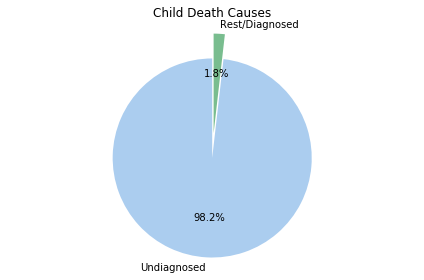

In [92]:
diseaseDistr = childrenDF.apply(np.sum,axis=0)
df = pd.DataFrame(diseaseDistr)
df.columns = ['Numbers']
df = df.sort_values(['Numbers'])
top = df.iloc[4:5,]
rest = pd.DataFrame(df.iloc[:4,].apply(np.sum,axis=0))
rest.index = ['Rest/Diagnosed']
rest.columns = ['Numbers']
df = top.append(rest)
# Create a list of colors (from iWantHue)
colors = ["#ABCDEF", "#79BD8F"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    df['Numbers'],
    # with the labels being officer names
    labels=list(df.index),
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.25, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Child Death Causes')
# View the plot
plt.tight_layout()
plt.show()

### Adults

In [93]:
adultsDF = adults.ix[[('Diarrhoeal diseases','Total'),('Tuberculosis','Total'),('Respiratory diseases including infections (other than TB)','Total'),('Malaria','Total'),('Other Fever Related','Total'),('HIV/AIDS','Total'),('Heart disease/Hypertension related','Total'),('Neurological disease including strokes','Total'),('Known Acute Disease','Total'),('Known Chronic Disease','Total'),('Causes not known','Total')]]

In [94]:
adultsDF = adultsDF.T


In [95]:
adultsDF.columns = ['Diarrhoeal','Tuberculosis','Respiratory','Malaria','Fever-Related','HIV/AIDS','Heart-disease/Hypertension','Neurological','Known Acute','Known Chronic','Unknown']

In [96]:
p = Line(adultsDF, notebook=True)
p.xaxis.axis_label = 'Month'
p.yaxis.axis_label = '#Deaths'
p.width = 900
p.height = 450
show(p)

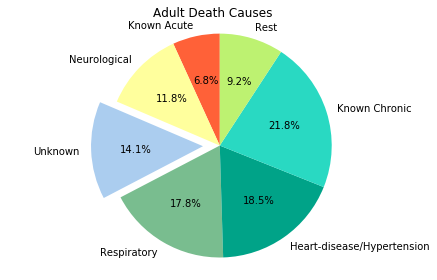

In [97]:
diseaseDistr = adultsDF.apply(np.sum,axis=0)
df = pd.DataFrame(diseaseDistr)
df.columns = ['Numbers']
df = df.sort_values(['Numbers'])
top6 = df.iloc[5:12,]
rest = pd.DataFrame(df.iloc[:6,].apply(np.sum,axis=0))
rest.index = ['Rest']
rest.columns = ['Numbers']
df = top6.append(rest)
# Create a list of colors (from iWantHue)
colors = ["#FF6138", "#FFFF9D", "#ABCDEF", "#79BD8F", "#00A388", "#29D9C2","#BDF271"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    df['Numbers'],
    # with the labels being officer names
    labels=list(df.index),
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0.15, 0, 0,0,0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Adult Death Causes')
# View the plot
plt.tight_layout()
plt.show()

### Mothers

In [98]:
maternalDF = maternal.ix[[('Abortion','Total'),('Obstructed/prolonged labour','Total'),('Severe hypertesnion/fits','Total'),('Bleeding','Total'),('High fever','Total'),('Trauma/Accidents/Burn cases ','Total'),('Suicide','Total'),('Animal bites and stings','Total'),('Other Causes (including causes not known)','Total')]]

In [99]:
maternalDF = maternalDF.T
maternalDF.columns = ['Abortion','Obstructed/prolonged labour','Severe hypertesnion/fits','Bleeding','High fever','Trauma/Accidents/Burn cases ','Suicide','Animal bites and stings','Other Causes (including causes not known)']

In [100]:
p = Line(maternalDF, notebook=True)
p.xaxis.axis_label = 'Month'
p.yaxis.axis_label = '#Deaths'
p.width = 900
p.height = 450
show(p)

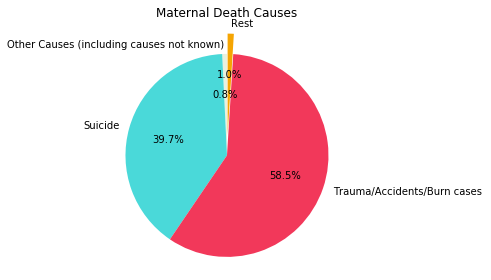

In [101]:
diseaseDistr = maternalDF.apply(np.sum,axis=0)
df = pd.DataFrame(diseaseDistr)
df.columns = ['Numbers']
df = df.sort_values(['Numbers'])
top3 = df.iloc[6:9,]
rest = pd.DataFrame(df.iloc[:6,].apply(np.sum,axis=0))
rest.index = ['Rest']
rest.columns = ['Numbers']
df = top3.append(rest)
# Create a list of colors (from iWantHue)
colors = ["#E9F1DF","#4AD9D9","#F2385A", "#F5A503"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    df['Numbers'],
    # with the labels being officer names
    labels=list(df.index),
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0, 0.20),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.title('Maternal Death Causes')
# View the plot
plt.tight_layout()
plt.show()
